In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving evaluation_with_fire_and_coordinates_and_date.csv to evaluation_with_fire_and_coordinates_and_date.csv


In [ ]:
df = pd.read_csv("evaluation_with_fire_and_coordinates_and_date.csv")

df.head()

,ID_UEV,CIVIQUE_DEBUT,CIVIQUE_FIN,NOM_RUE,SUITE_DEBUT,MUNICIPALITE,ETAGE_HORS_SOL,NOMBRE_LOGEMENT,ANNEE_CONSTRUCTION,CODE_UTILISATION,...,MATRICULE83,SUPERFICIE_TERRAIN,SUPERFICIE_BATIMENT,NO_ARROND_ILE_CUM,NOM_RUE_CLEAN,fire_date,fire,ADDR_DE,LONGITUDE,LATITUDE
0,1038405,3577,3577,avenue Atwater (MTL+WMT),NaN,50,1.0,1.0,1983.0,1921,...,9739-83-9737-8-001-0431,2,16.0,REM19,avenue atwater,NaN,False,3577.0,-73.588602,45.493711
1,5213144,5211,5211,rue du Sureau (PFD),105,50,1.0,1.0,2012.0,1000,...,7941-06-3037-4-001-0004,69,68.0,REM31,rue du sureau,NaN,False,NaN,NaN,NaN
2,1036349,3550,3550,rue de la Montagne (MTL),109,50,3.0,1.0,1983.0,1000,...,9840-31-8010-6-001-0005,133,127.0,REM19,rue de la montagne,NaN,False,NaN,NaN,NaN
3,5189527,1200,1200,rue Saint-Alexandre (MTL),511,50,1.0,1.0,1963.0,1000,...,9940-55-8522-7-001-0257,16,62.0,REM19,rue saint-alexandre,NaN,False,NaN,NaN,NaN
4,1037334,1254,1254,rue Saint-Marc (MTL),61,50,1.0,1.0,1914.0,1000,...,9839-51-6255-9-001-0013,16,82.0,REM19,rue saint-marc,2023-01-07 01:45:48,True,1254.0,-73.579815,45.492286


In [ ]:
df['fire_date'] = pd.to_datetime(df['fire_date'], errors='coerce')

df = df.dropna(subset=['fire_date'])

In [ ]:
df.set_index('fire_date', inplace=True)

monthly_fires = df.resample('M').size()

/tmp/ipython-input-4-1008159887.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_fires = df.resample('M').size()


In [ ]:
monthly_fires_df = monthly_fires.reset_index()
monthly_fires_df.columns = ['Month', 'Fire_Count']

monthly_fires_df.head()

,Month,Fire_Count
0,2020-01-31,4826
1,2020-02-29,4501
2,2020-03-31,4835
3,2020-04-30,4684
4,2020-05-31,7988


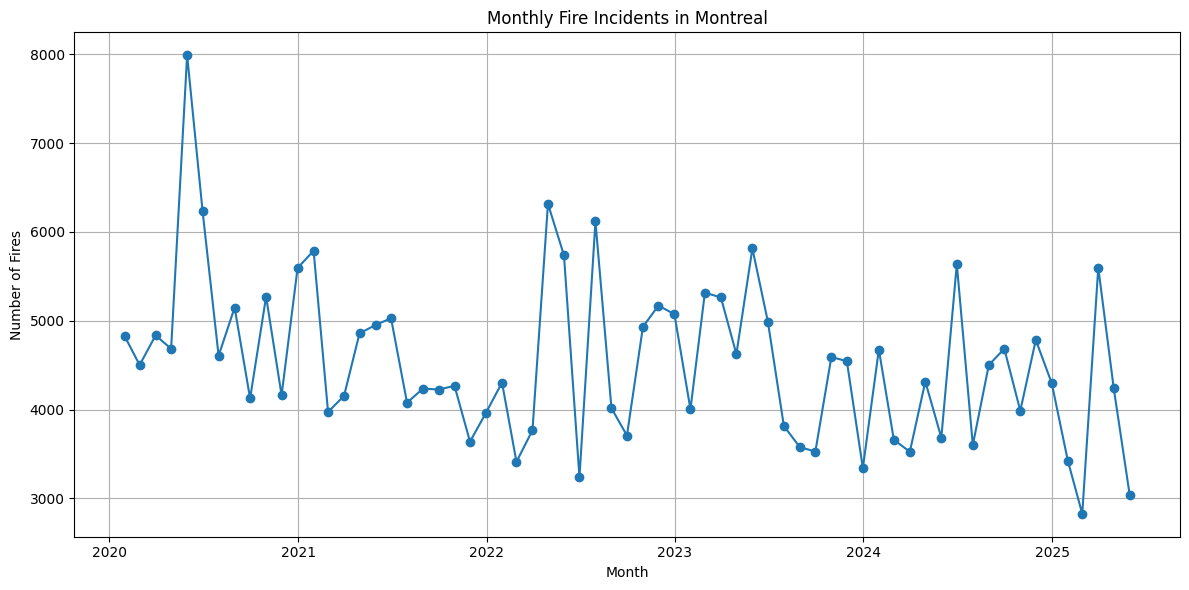

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_fires_df['Month'], monthly_fires_df['Fire_Count'], marker='o')
plt.title("Monthly Fire Incidents in Montreal")
plt.xlabel("Month")
plt.ylabel("Number of Fires")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
monthly_fires_df.to_csv("monthly_fire_counts.csv", index=False)
print("Saved as monthly_fire_counts.csv")

Saved as monthly_fire_counts.csv


In [ ]:
from google.colab import files

files.download("monthly_fire_counts.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Prophet is now called `prophet`, not `fbprophet`
!pip install prophet

from prophet import Prophet

In [ ]:
#Load the monthly fire counts
monthly_fires_df = pd.read_csv("monthly_fire_counts.csv")

#Rename columns for Prophet
df_prophet = monthly_fires_df.rename(columns={"Month": "ds", "Fire_Count": "y"})

#Preview
df_prophet.head()

,ds,y
0,2020-01-31,4826
1,2020-02-29,4501
2,2020-03-31,4835
3,2020-04-30,4684
4,2020-05-31,7988


In [ ]:
#Initialize and fit the model
model = Prophet()
model.fit(df_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxi7zj76o/cvqklcds.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxi7zj76o/0feye731.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76106', 'data', 'file=/tmp/tmpxi7zj76o/cvqklcds.json', 'init=/tmp/tmpxi7zj76o/0feye731.json', 'output', 'file=/tmp/tmpxi7zj76o/prophet_modeljlmz6_ql/prophet_model-20250623012815.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:28:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:28:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Create future dataframe for 12 more months
future = model.make_future_dataframe(periods=12, freq='M')

#Predict
forecast = model.predict(future)

#Show forecast columns
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
72,2026-01-31,3832.784245,2852.601462,4770.486097
73,2026-02-28,3302.928138,2357.912477,4226.835338
74,2026-03-31,3831.992447,2883.708766,4779.036534
75,2026-04-30,4227.422378,3310.476603,5193.796267
76,2026-05-31,4512.950839,3659.631595,5513.371569


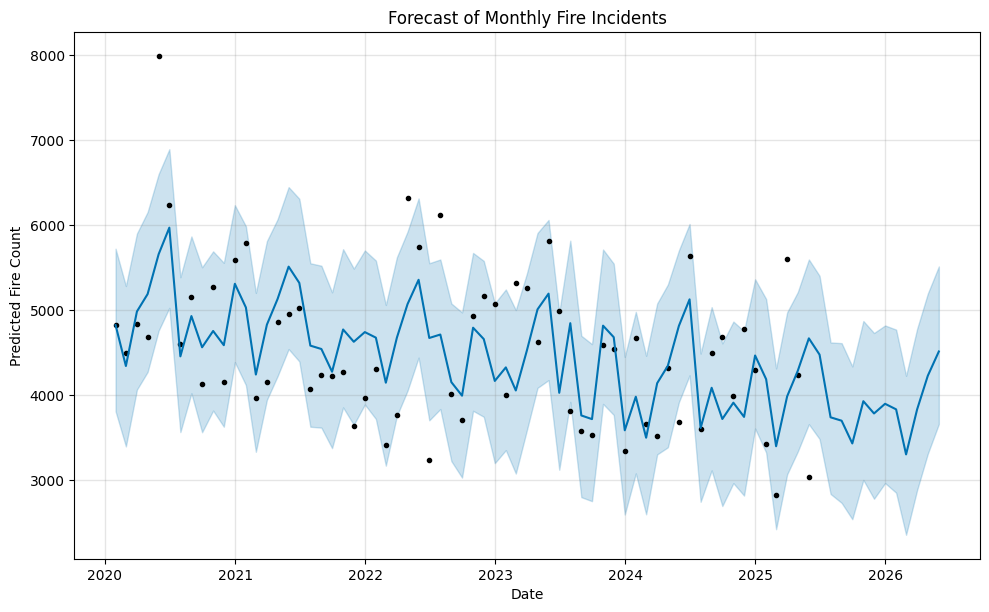

In [ ]:
#Plot forecast
fig = model.plot(forecast)
plt.title("Forecast of Monthly Fire Incidents")
plt.xlabel("Date")
plt.ylabel("Predicted Fire Count")
plt.grid(True)
plt.show()

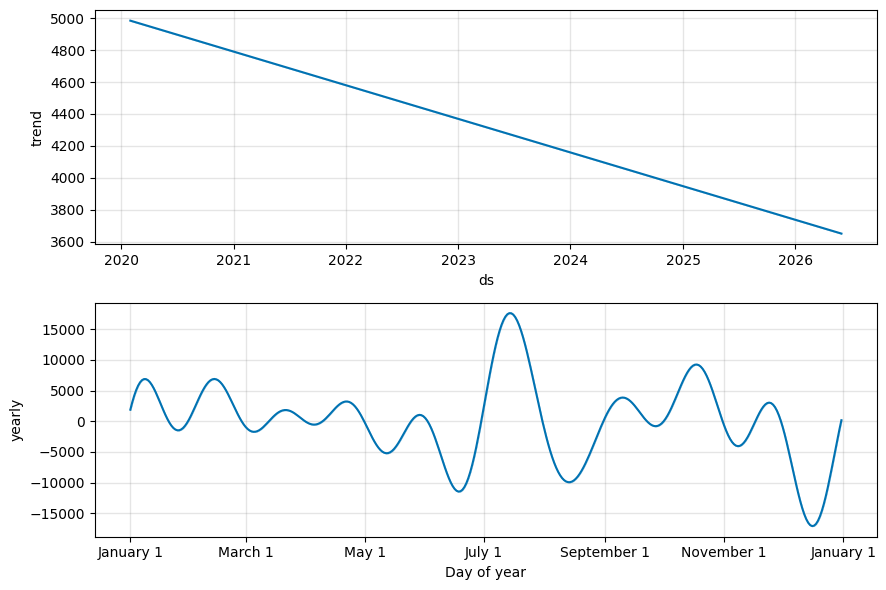

In [ ]:
#Plot components: trend + seasonality
model.plot_components(forecast)
plt.show()